## Image Generation with Neural Autoregressive Density Estimation (NADE)


In [19]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.autograd import Variable

In [20]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [21]:
# Define the NADE model
class NADE(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NADE, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        h = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(h))

    def generate(self, batch_size):
        samples = torch.zeros(batch_size, self.input_dim)
        with torch.no_grad():
            for i in range(self.input_dim):
                h = torch.relu(self.fc1(samples))
                prob = torch.sigmoid(self.fc2(h))
                samples[:, i] = torch.bernoulli(prob[:, i])
        return samples

In [22]:
# Initialize the model and optimizer
input_dim = 28 * 28  # images are 28x28 pixels
hidden_dim = 256  # can adjust it further
model = NADE(input_dim, hidden_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
# Training loop
for epoch in range(15):  # loop over the dataset multiple times
    running_loss = 0.0
    print(epoch)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, _ = data
        inputs = inputs.view(inputs.shape[0], -1)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        inputs = inputs / 2 + 0.5
        loss = nn.BCELoss()(outputs, inputs)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0



print('Finished Training')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Finished Training


In [27]:
# Training loop
for epoch in range(15):  # loop over the dataset multiple times
    running_loss = 0.0
    print(epoch)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, _ = data
        inputs = inputs.view(inputs.shape[0], -1)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        inputs = inputs / 2 + 0.5
        loss = nn.BCELoss()(outputs, inputs)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0



print('Finished Training')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Finished Training


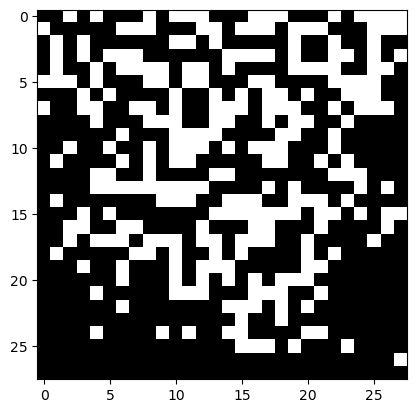

In [28]:
import matplotlib.pyplot as plt

# Generate a new image
new_image = model.generate(1)
# Reshape the image to 28x28 pixels
new_image = new_image.view(28, 28)
# Convert tensor to numpy array
new_image = new_image.detach().numpy()
# Display the image
plt.imshow(new_image, cmap='gray')
plt.show()